# December 2024 Puzzle Solution

The quality of a joke is equal to the probability that you tell it to a friend the next time you see them. The diagram above shows the sequence of social interactions between the members of Cody’s immediate friend group.

 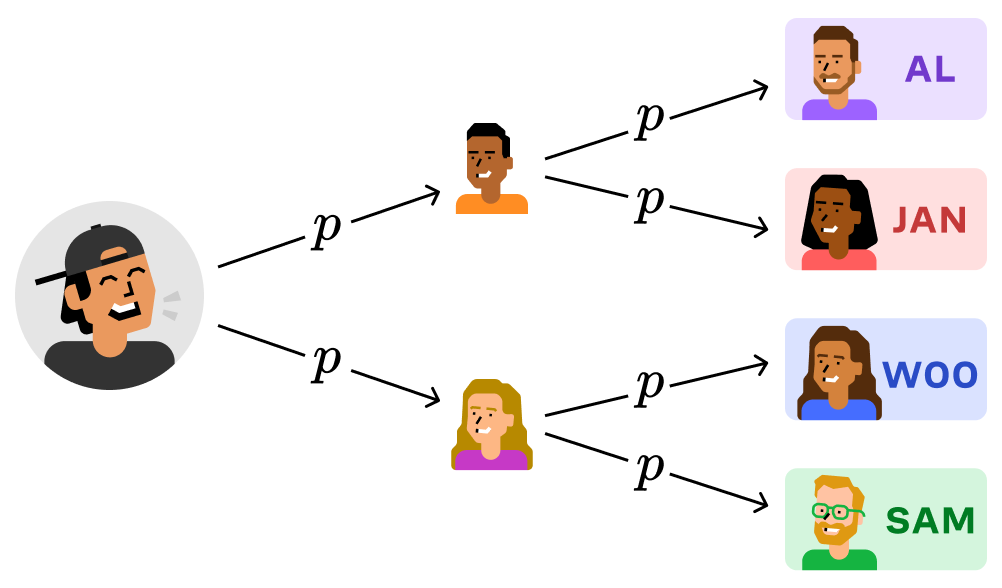

**If Cody hears a joke of quality p = 0.6, what’s the probability that Al, Jan, Woo, or Sam hears it?**

Bonus: Now Cody’s social network is infinitely deep, with a sequence of interactions that continues the pattern above. What’s the chance that infinitely many people hear the joke?


## Solution (this solution is not correct) 

[Correct solution on brilliant](https://brilliantorg.notion.site/December-Puzzle-Solution-162b4926c48580e2b31acc054836b6d9)

Al, Jan, Woo, and Sam are Cody's 2nd-level friends. If anyone from the 2nd level hears the joke, it implies that someone from the 1st level heard it and passed it on with probability $p = 0.6$. Thus, the probability that any arbitrary 2nd-level friend hears the joke is:

$$
\mathrm{P}(\text{2nd-level friend hears the joke}) = p \cdot \mathrm{P}(\text{1st-level friend heard the joke}).
$$

Effectively, $\mathrm{P}(\text{1st-level friend heard the joke})$ is the probability that Cody himself told the joke to that friend, which is also $p$. Hence:

$$
\mathrm{P}(\text{2nd-level friend hears the joke}) = p^2 = 0.36.
$$

The complementary probability is:

$$
\mathrm{P}(\text{2nd-level friend does not hear the joke}) = 1 - p^2 = 1 - 0.36 = 0.64.
$$

For the $n-th$ level, this generalizes to:


$$
\mathrm{P}(\text{n-th level friend hears the joke}) = p^n
$$
$$
\mathrm{P}(\text{n-th level friend does not hear the joke}) = 1 - p^n
$$



The event that at least one of Al, Jan, Woo, or Sam hears the joke is equivalent to the complement of the event that none of them hears the joke:

$$
\mathrm{P}(\text{at least one of 2nd-level friends hears the joke}) = 1 - \mathrm{P}(\text{none of 2nd-level friends hears the joke}).
$$

Since there are four 2nd-level friends, the probability becomes:

$$
\mathrm{P}(\text{none of 2nd-level friends hears the joke}) = (1 - p^2)^4.
$$

Thus:

$$
\mathrm{P}(\text{at least one of 2nd-level friends hears the joke}) = 1 - (1 - p^2)^4 = 1 - 0.64^4 = 0.8322278.
$$





## Bonus

For $n$-th level friends, the probability that at least one of them hears the joke is:

$$
\mathrm{P}(\text{at least one of n-th level friends hears the joke}) = 1 - (1 - p^n)^{2^n}.
$$


If the joke spreads to the $n$-th level, at least $n$ friends from the previous levels must have heard it. Since the tree structure is identical across levels, we can apply the same reasoning to the $(n + 1)$-st level and so on, leading us to intuitively conclude that the joke can spread infinitely in a large enough tree.


We can confirm this intuition by plotting the function:

$$
f(n) = 1 - (1 - p^n)^{2^n}
$$

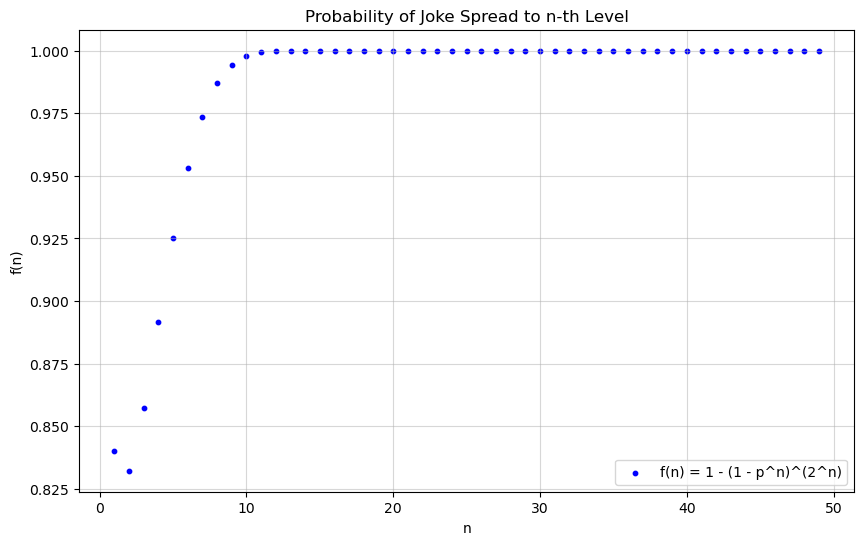

In [5]:
import numpy as np
import matplotlib.pyplot as plt


p = 0.6


def f(n):
    return 1 - (1 - p**n)**(2**n)


n_values = np.arange(1, 50)
y_values = f(n_values)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(n_values, y_values, s=10, color='blue', label="f(n) = 1 - (1 - p^n)^(2^n)")
plt.title("Probability of Joke Spread to n-th Level")
plt.xlabel("n")
plt.ylabel("f(n)")
plt.legend()
plt.grid(alpha=0.5)
plt.show()


The plot shows that $f(n)$ approaches 1 as $n \to \infty$, confirming that the joke is almost certain to spread infinitely under these conditions.


## Interesting 

An interesting question is whether there is a threshold value of $p$ below which the joke will eventually die out. The average number of people who hear the joke at the $n$-th level is:

$$
S_n = 2^n \cdot p^n = 2^{n \cdot (1 + \log_2 p)}.
$$

As $n \to \infty$:

1) If $1 + \log_2 p > 0$, $S_n \to \infty$ (infinite spread).
2) If $1 + \log_2 p \leq 0$, $S_n \to 0$ (joke dies out).



The threshold occurs when:

$$
1 + \log_2 p = 0 \implies p = \frac{1}{2}.
$$

### Chain Reaction Analogy
This behaviour is reminiscent of a chain reaction in a nuclear reactor. In reactor physics, the neutron multiplication factor $k$ determines whether the reaction is sustained:

1) $k < 1$: Reaction decreases over time.
2) $k = 1$: Reaction is self-sustaining (critical).
3) $k > 1$: Reaction grows exponentially.


Similarly, for the joke to spread infinitely, $p$ must exceed the critical threshold of $\frac{1}{2}$.

### Conclusion
This analysis shows that the joke’s spread depends heavily on the probability $p$. When $p > 0.5$, the joke spreads infinitely. When $p \leq 0.5$, it eventually dies out, mirroring concepts from physics and probability theory.
